# Trend Following Strategy

## Market Trends and Consumer Psychology
Art its evolution, relevance, and potential demise has captured the imagination of many. Yet, the true pulse of art’s vitality might be more intricately tied to the mechanisms of markets and consumer psychology than we might expect. This study, inspired by Oriental Culture Holdings (OCG), ventures into the confluence of market trends, technical indicators, and cognitive processes to uncover the undercurrents shaping perceptions of art. Through the lens of trading strategies and psychological insights, this small narrative explores the state of art in a world of financial speculation.

## Moving Averages and Market Insights
To grasp the essence of market dynamics, we turned to the tools of technical analysis: the simple moving average (SMA) and the exponential moving average (EMA). Moving averages smooth out price data, revealing trends obscured by daily fluctuations. The SMA, computed over a set window, gives equal weight to all data points, while the EMA emphasizes recent prices, reacting more swiftly to shifts. 
The journey began with constructing a 3 period SMA, using rolling windows in a Pandas DataFrame to extract averages. This was followed by integrating a 20 period SMA for a broader perspective. The EMA, calculated with a smoothing factor α, offered an even sharper lens, its values responding dynamically to the ebb and flow of market forces. The resulting visualizations painted a vivid picture of OCG’s price trends, laying the groundwork for a deeper exploration of trading strategies.


In [789]:
import numpy as np                
import pandas as pd             
import matplotlib.pyplot as plt              
import yfinance as yf
           
symbol = 'OCG'
              
df = yf.download(symbol, start="2020-01-01", end="2023-12-30")
             
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,OCG,OCG,OCG,OCG,OCG
Date,,,,,
2020-12-15,30.000000,41.849998,29.000,31.250000,264280
2020-12-16,30.500000,32.799999,26.350,31.250000,276580
2020-12-17,36.650002,129.250000,31.400,86.199997,5819640
2020-12-18,30.000000,35.500000,30.000,35.299999,1187400
2020-12-21,31.500000,32.750000,27.000,28.400000,977340
...,...,...,...,...,...
2023-12-22,1.200000,1.388000,1.040,1.046000,12800
2023-12-26,1.280000,1.280000,1.040,1.150000,5600


In [791]:

# single-period percentage returns

returns = df.Close.pct_change()
returns

Ticker,OCG
Date,
2020-12-15,NaN
2020-12-16,0.016667
2020-12-17,0.201639
2020-12-18,-0.181446
2020-12-21,0.050000
...,...
2023-12-22,0.176471
2023-12-26,0.066667
2023-12-27,0.000000


In [793]:
# Calculating the terminal return using the original approach by definition 

terminal_return = df.Close.iloc[-1] / df.Close.iloc[0] - 1
terminal_return

Ticker
OCG   -0.952333
dtype: float64

In [795]:
cum_returns = (1+returns).cumprod() - 1
cum_returns

Ticker,OCG
Date,
2020-12-15,NaN
2020-12-16,1.666667e-02
2020-12-17,2.216667e-01
2020-12-18,-1.110223e-16
2020-12-21,5.000000e-02
...,...
2023-12-22,-9.600000e-01
2023-12-26,-9.573333e-01
2023-12-27,-9.573333e-01


In [797]:
# check equality on terminal return
cum_returns.values[-1] == terminal_return
               
True

True

In [799]:
#  Calculating the log returns

log_returns = np.log(1+returns)
log_returns

Ticker,OCG
Date,
2020-12-15,NaN
2020-12-16,0.016529
2020-12-17,0.183687
2020-12-18,-0.200216
2020-12-21,0.048790
...,...
2023-12-22,0.162519
2023-12-26,0.064538
2023-12-27,0.000000


In [801]:
# Calculating the cumulative returns using log returns

                
cum_return2 = np.exp(log_returns.cumsum()) - 1
cum_return2


Ticker,OCG
Date,
2020-12-15,NaN
2020-12-16,1.666667e-02
2020-12-17,2.216667e-01
2020-12-18,-1.110223e-16
2020-12-21,5.000000e-02
...,...
2023-12-22,-9.600000e-01
2023-12-26,-9.573333e-01
2023-12-27,-9.573333e-01


In [811]:
import numpy as np
import pandas as pd            
import matplotlib.pyplot as plt          
import yfinance as yf
         
symbol = 'OCG'
           
df = yf.download(symbol, start="2020-01-01", end="2023-12-30")
             
df.index = pd.to_datetime(df.index)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,OCG,OCG,OCG,OCG,OCG
Date,,,,,
2020-12-15,30.000000,41.849998,29.00,31.250000,264280
2020-12-16,30.500000,32.799999,26.35,31.250000,276580
2020-12-17,36.650002,129.250000,31.40,86.199997,5819640
2020-12-18,30.000000,35.500000,30.00,35.299999,1187400
2020-12-21,31.500000,32.750000,27.00,28.400000,977340


<Figure size 2000x1000 with 0 Axes>

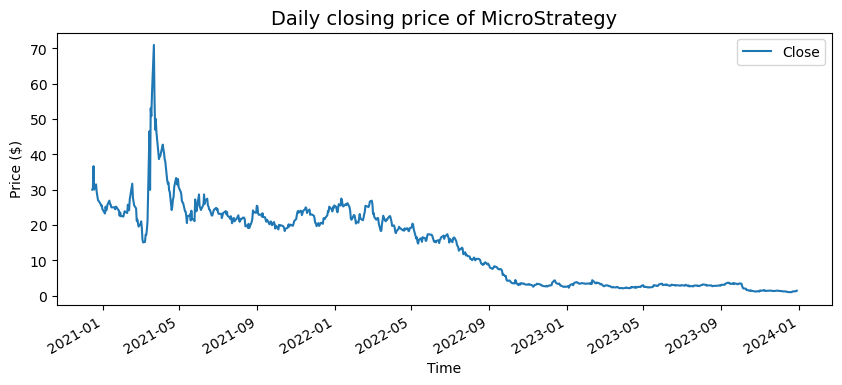

In [813]:
# plot the adj closing price

                
plt.figure(figsize=(20, 10))            
df['Close'].plot()

                
# set labels and sizes of the title and axis
         
plt.title('Daily closing price of MicroStrategy', fontsize=14)       
plt.xlabel('Time', fontsize=10)
plt.ylabel('Price ($)', fontsize=10)           
plt.xticks(fontsize=10)   
plt.yticks(fontsize=10)    
plt.legend(['Close'], prop={'size': 10})
    
# show the plot
plt.show()

In [815]:
window = 3           
SMA1 = "SMA-"+str(window) 
SMA1

'SMA-3'

In [817]:
# Creating simple moving averages

window = 3           
SMA1 = "SMA-"+str(window)           
df[SMA1] = df['Close'].rolling(window).mean()   
colnames = ["Close",SMA1]
   
df2 = df[colnames]
df2.head()

Price,Close,SMA-3
Ticker,OCG,
Date,,
2020-12-15,30.000000,NaN
2020-12-16,30.500000,NaN
2020-12-17,36.650002,32.383334
2020-12-18,30.000000,32.383334
2020-12-21,31.500000,32.716667


In [819]:
np.mean(df['Close'][:3])

32.38333384195963

In [821]:
# Average value based on the available data in the window

df['New_SMA'] = df['Close'].rolling(window, min_periods=1).mean()
df[colnames + ['New_SMA']].head()

Price,Close,SMA-3,New_SMA
Ticker,OCG,,
Date,,,
2020-12-15,30.000000,NaN,30.000000
2020-12-16,30.500000,NaN,30.250000
2020-12-17,36.650002,32.383334,32.383334
2020-12-18,30.000000,32.383334,32.383334
2020-12-21,31.500000,32.716667,32.716667


Text(0, 0.5, 'Price')

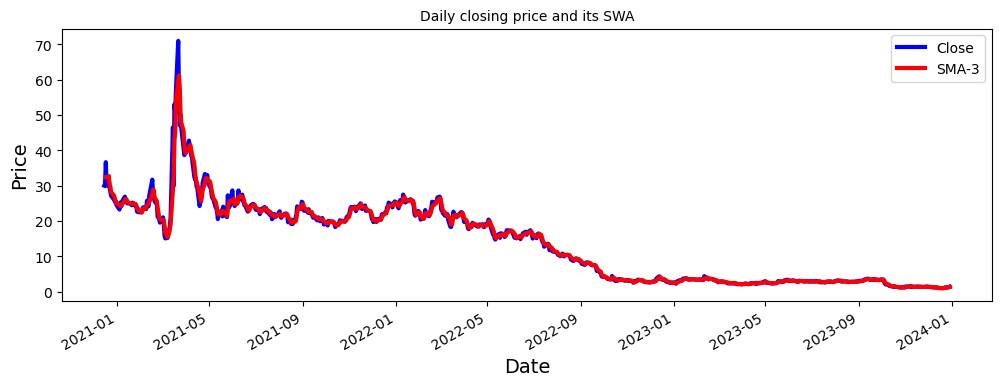

In [823]:
# Plotting the closing price and its SMA

# colors for the line plot

colors = ['blue', 'red']

# line plot for original price and SMA

df2.plot(color=colors, linewidth=3, figsize=(12,4))
                
# modify ticks size

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)        
plt.legend(labels = colnames, fontsize=10)
                
# title and labels
      
plt.title('Daily closing price and its SWA', fontsize=10)      
plt.xlabel('Date', fontsize=14)         
plt.ylabel('Price', fontsize=14)

#### Moving Averages and Market Insights
The following figures show the price trends of OCG stock over time, with overlays of SMA-3, SMA-20, and EWM with varying α values. The alignment and divergence of these lines reflect market momentum and investor sentiment. For instance, the "Daily price with SWA and EWM" chart vividly demonstrates how different smoothing parameters yield unique insights, offering traders varying levels of sensitivity to price changes. This foundational analysis reflect the importance of selecting the appropriate window sizes and parameters to match specific market conditions.


/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/2275254593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, SMA2] = df2["Close"].rolling(window=window).mean()


Text(0, 0.5, 'Price')

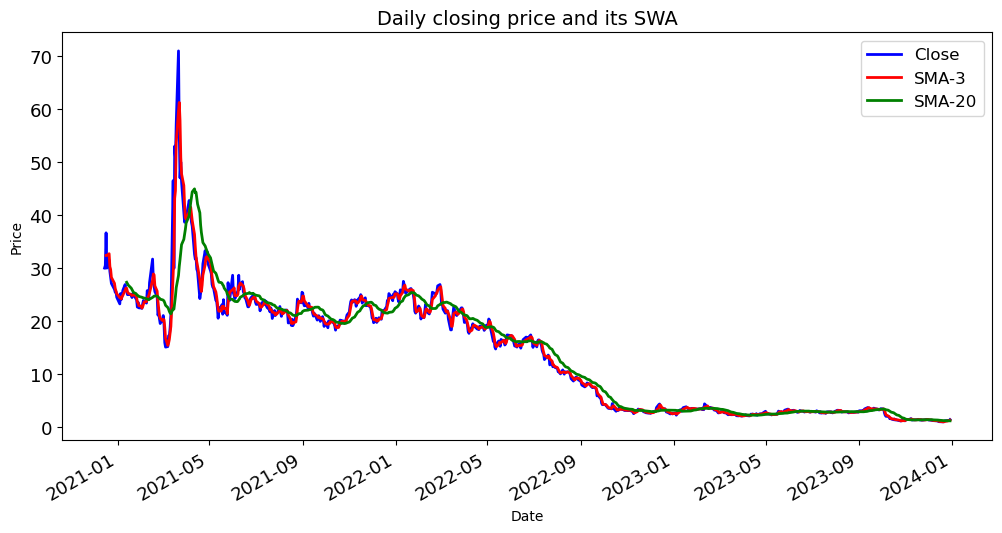

In [825]:
window = 20

                
SMA2 = "SMA-"+str(window)

df2.loc[:, SMA2] = df2["Close"].rolling(window=window).mean()
                
colnames = ["Close",SMA1,SMA2]



# colors for the line plot

                
colors = ['blue', 'red', 'green']

                
# line plot for original price and SMA

                
df2.plot(color=colors, linewidth=2, figsize=(12,6))

                
# modify ticks size

                
plt.xticks(fontsize=13)

                
plt.yticks(fontsize=13)

                
plt.legend(labels = colnames, fontsize=12)

                
# title and labels

                
plt.title('Daily closing price and its SWA', fontsize=14)

                
plt.xlabel('Date', fontsize=10)

                
plt.ylabel('Price', fontsize=10)

### Signals of Belief and Action
When the SMA-3 (short-term) crossed above the SMA-20 (long-term), it signaled a buy action, heralding optimism and growth. Conversely, a crossover below the SMA-20 marked a sell signal, reflecting caution or pessimism. These crossovers were not merely technical phenomena but manifestations of collective belief systems encoded into market behavior.
To operationalize this, we shifted moving averages by one day, ensuring that decisions were based solely on historical data. This temporal discipline underscored the realism of the strategy, as traders can only act on what has been observed. The signals generated revealed 486 sell actions and 259 buy actions, indicating a market more often predisposed to caution than exuberance.


In [827]:
alpha = 0.1

df2.loc[:, "EWM_" + str(alpha)] = df2["Close"].ewm(alpha=alpha, adjust=False).mean()
                
df2.head()

/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/2022649468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, "EWM_" + str(alpha)] = df2["Close"].ewm(alpha=alpha, adjust=False).mean()


Price,Close,SMA-3,SMA-20,EWM_0.1
Ticker,OCG,,,
Date,,,,
2020-12-15,30.000000,NaN,NaN,30.0000
2020-12-16,30.500000,NaN,NaN,30.0500
2020-12-17,36.650002,32.383334,NaN,30.7100
2020-12-18,30.000000,32.383334,NaN,30.6390
2020-12-21,31.500000,32.716667,NaN,30.7251


In [829]:
alpha = 0.5

                
df2['EWM_'+str(alpha)]= df2['Close'].ewm(alpha=alpha, adjust=False).mean()

                
df2.head()


/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/1342698967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWM_'+str(alpha)]= df2['Close'].ewm(alpha=alpha, adjust=False).mean()


Price,Close,SMA-3,SMA-20,EWM_0.1,EWM_0.5
Ticker,OCG,,,,
Date,,,,,
2020-12-15,30.000000,NaN,NaN,30.0000,30.000000
2020-12-16,30.500000,NaN,NaN,30.0500,30.250000
2020-12-17,36.650002,32.383334,NaN,30.7100,33.450001
2020-12-18,30.000000,32.383334,NaN,30.6390,31.725000
2020-12-21,31.500000,32.716667,NaN,30.7251,31.612500


Text(0, 0.5, 'Price')

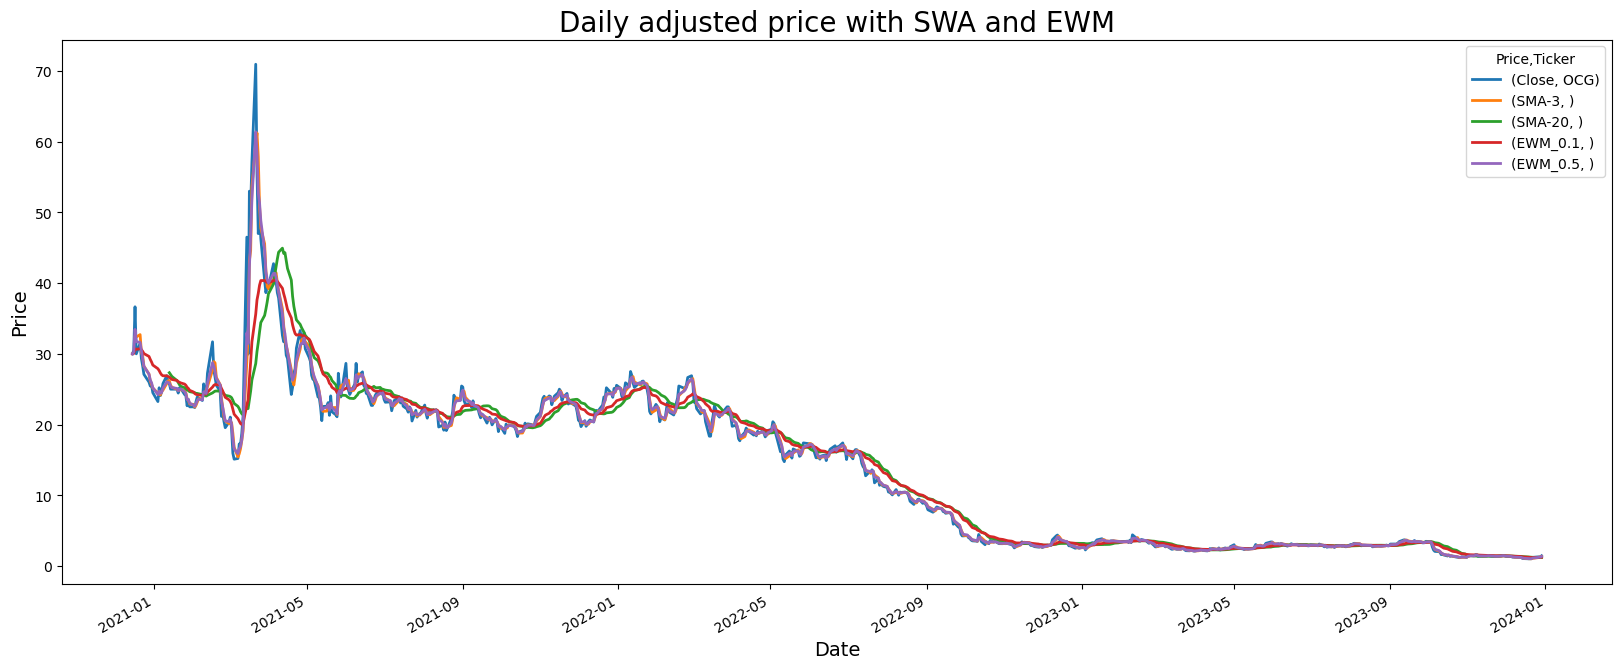

In [831]:
df2.plot(linewidth=2, figsize=(20, 8))
            
plt.title('Daily adjusted price with SWA and EWM', fontsize=20)          
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

In [833]:
# Implementing the Trend-Following Strategy

df2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 765 entries, 2020-12-15 to 2023-12-29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Close, OCG)  765 non-null    float64
 1   (SMA-3, )     763 non-null    float64
 2   (SMA-20, )    746 non-null    float64
 3   (EWM_0.1, )   765 non-null    float64
 4   (EWM_0.5, )   765 non-null    float64
dtypes: float64(5)
memory usage: 35.9 KB


In [835]:
# Shift to the future by one day so that everyday uses the information up to

                
# yesterday to make a trading decision for tmr

                
df2['SMA-3'] = df2['SMA-3'].shift(1)
                
df2['SMA-20'] = df2['SMA-20'].shift(1)
df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-20'], 1, 0)

                
# identify sell signal

                
df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-20'], -1, df2['signal'])

                
df2.dropna(inplace=True)
df2['signal'].value_counts()

/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/647862685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-3'] = df2['SMA-3'].shift(1)
/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/647862685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-20'] = df2['SMA-20'].shift(1)
/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/647862685.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

signal
-1    486
 1    259
Name: count, dtype: int64

Transitions between states (2.0 for entering long positions and -2.0 for entering short positions) were rare, occurring only 28 and 27 times, respectively. These distributions point to a market characterized by extended periods of stagnation interspersed with infrequent but decisive shifts in momentum.

In [837]:
df2['log_return_buy_n_hold'] = np.log(df2['Close']).diff()
df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']


/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/2933038220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_buy_n_hold'] = np.log(df2['Close']).diff()
/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/2933038220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']


In [839]:
df2['action'] = df2.signal.diff()
df2['action'].value_counts()

/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/2312169697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['action'] = df2.signal.diff()


action
 0.0    689
 2.0     28
-2.0     27
Name: count, dtype: int64

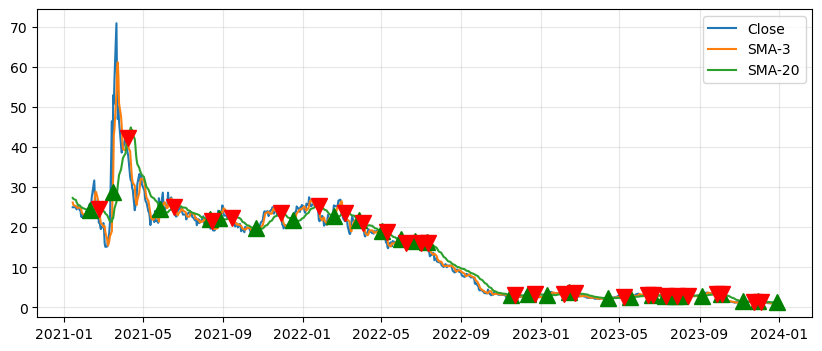

In [841]:

 # Visualizing trading actions             

                
plt.rcParams['figure.figsize'] = 10, 4
           
plt.grid(True, alpha = .3)
            
plt.plot(df2['Close'], label = 'Close')

                
plt.plot(df2['SMA-3'], label = 'SMA-3')

                
plt.plot(df2['SMA-20'], label = 'SMA-20')

                
plt.plot(df2.loc[df2.action == 2].index, df2['SMA-3'][df2.action == 2], '^',

                
         color = 'g', markersize = 12)

                
plt.plot(df2[df2.action == -2].index, df2['SMA-20'][df2.action == -2], 'v',

                
         color = 'r', markersize = 12)

                
plt.legend(loc=1);


The high frequency of red signals (sell) aligns with the broader downtrend observed in the "Cumulative return of different trading strategies" chart, where both buy and hold and trend following approaches yielded negative returns. However, the trend following strategy (-70.87%) fared slightly better than buy and hold (-94.28%), suggesting that tactical responses to market shifts can mitigate losses even in declining markets.

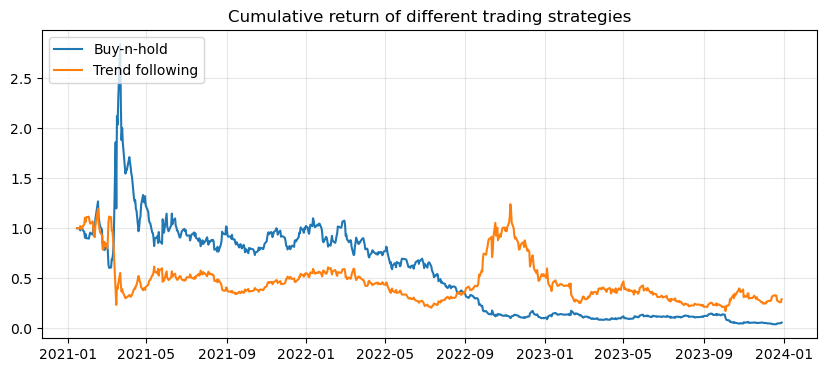

In [843]:
plt.plot(np.exp(df2['log_return_buy_n_hold']).cumprod(), label='Buy-n-hold')
            
plt.plot(np.exp(df2['log_return_trend_follow']).cumprod(), label='Trend following')
                
plt.legend(loc=2)
            
plt.title("Cumulative return of different trading strategies")
                
plt.grid(True, alpha=.3)


In [845]:
# terminal return of buy-n-hold

np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] -1

/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/2704913489.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] -1


-0.9428000020980836

In [847]:
# terminal return of trend following

np.exp(df2['log_return_trend_follow']).cumprod()[-1] -1

/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_53922/602566586.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(df2['log_return_trend_follow']).cumprod()[-1] -1


-0.7086706111951241

### The Cognitive Connection
In "The Psychology of Consumer Behavior" by Mullen and Johnson, the processes of cognition and memory emerge as pivotal in shaping beliefs. Memory through encoding, storage, and retrieval influences how consumers retain and act upon information. Cognition, in turn, transforms these memories into evaluative beliefs.
Art, much like a product in the marketplace, is subject to these cognitive processes. The Getty Museum’s Creative Commons Zero (CC0) initiative, which makes digital images freely available, is a case in point. Despite the democratization of access, the diminished market value of such assets hints at a disconnect between availability and perceived value. This phenomenon aligns with the serial position effect in memory, where items at the beginning or end of a sequence are better retained. In a saturated market, the middle where most art resides, struggles for recognition. The "Daily closing price of OCG" chart, included as a comparative benchmark, mirrors this challenge. Like art, stocks subjected to widespread speculation experience sharp initial interest followed by prolonged neglect, as seen in the stark decline after 2021. The psychology of consumer memory and cognition offers a lens to understand why some assets lose their allure over time despite their inherent or historical value.

### Reflection
As the digital age continues to democratize access to art, questions arise about its impact on the cultural and psychological experience of art appreciation. The availability of high-resolution digital art, such as that provided under Creative Commons Zero (CC0), has undoubtedly expanded access, enabling people worldwide to engage with artistic works. However, this accessibility may come at the cost of diminishing the perceived value and cultural gravitas traditionally associated with physical art in museums
